# Project: Covid-19 Data Analysis

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### 1. Import the dataset using Pandas from above mentioned url.

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/SR1608/Datasets/main/covid-data.csv")
data

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,31/12/19,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,01/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,02/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,03/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,04/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57389,NaN,NaN,International,13/11/20,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57390,NaN,NaN,International,14/11/20,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57391,NaN,NaN,International,15/11/20,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57392,NaN,NaN,International,16/11/20,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 2. High Level Data Understanding:
    a. Find no. of rows & columns in the dataset
    b. Data types of columns.
    c. Info & describe of data in dataframe.


In [3]:
# Find no. of rows & columns in the dataset
dt=data.shape
print("No. of rows: ",dt[0])
print("No. of columns: ",dt[1])

No. of rows:  57394
No. of columns:  49


In [4]:
# Data types of columns.
print("Data types of columns: ")
data.dtypes

Data types of columns: 


iso_code                               object
continent                              object
location                               object
date                                   object
total_cases                           float64
new_cases                             float64
new_cases_smoothed                    float64
total_deaths                          float64
new_deaths                            float64
new_deaths_smoothed                   float64
total_cases_per_million               float64
new_cases_per_million                 float64
new_cases_smoothed_per_million        float64
total_deaths_per_million              float64
new_deaths_per_million                float64
new_deaths_smoothed_per_million       float64
reproduction_rate                     float64
icu_patients                          float64
icu_patients_per_million              float64
hosp_patients                         float64
hosp_patients_per_million             float64
weekly_icu_admissions             

In [5]:
# Info & describe of data in dataframe.
print("**************** Info *****************")
data.info()
print("\n**************** Describe *****************")
data.describe()

**************** Info *****************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57394 entries, 0 to 57393
Data columns (total 49 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   iso_code                            57071 non-null  object 
 1   continent                           56748 non-null  object 
 2   location                            57394 non-null  object 
 3   date                                57394 non-null  object 
 4   total_cases                         53758 non-null  float64
 5   new_cases                           56465 non-null  float64
 6   new_cases_smoothed                  55652 non-null  float64
 7   total_deaths                        44368 non-null  float64
 8   new_deaths                          56465 non-null  float64
 9   new_deaths_smoothed                 55652 non-null  float64
 10  total_cases_per_million             53471 non-null  float64
 11  n

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
count,5.375800e+04,56465.000000,55652.000000,4.436800e+04,56465.000000,55652.000000,53471.000000,56401.000000,55587.000000,44096.000000,...,50367.000000,33571.000000,51013.000000,52881.000000,39669.000000,39156.000000,24176.000000,45936.000000,56336.000000,49247.000000
mean,1.677974e+05,1953.576941,1920.431953,6.858639e+03,47.054317,46.835439,3139.099982,39.344804,38.403211,95.335293,...,20620.172071,12.435453,252.646642,8.070269,10.741569,32.642686,52.089636,3.089724,73.937780,0.722223
std,1.693038e+06,18269.650340,17777.391785,5.578081e+04,390.853776,378.272794,6183.455260,133.985155,101.649441,180.721699,...,20310.999832,19.427924,117.522344,4.189605,10.470743,13.453566,31.645306,2.513193,7.397016,0.153261
min,1.000000e+00,-8261.000000,-552.000000,1.000000e+00,-1918.000000,-232.143000,0.001000,-2212.545000,-269.978000,0.000000,...,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000,0.354000
25%,1.800000e+02,0.000000,0.857000,1.300000e+01,0.000000,0.000000,90.033000,0.000000,0.260000,3.977750,...,5321.444000,0.500000,156.139000,5.310000,1.900000,21.400000,21.222000,1.300000,69.870000,0.601000
50%,2.070000e+03,14.000000,19.429000,8.400000e+01,0.000000,0.286000,593.663000,2.194000,3.863000,20.383000,...,13913.839000,2.000000,238.339000,7.110000,6.400000,31.400000,52.232000,2.500000,75.345000,0.752000
75%,2.235675e+04,235.000000,245.286000,7.270000e+02,4.000000,4.000000,3487.050000,25.941000,29.678500,90.571250,...,31400.840000,18.100000,318.991000,10.390000,19.600000,40.900000,83.741000,4.200000,79.380000,0.847000
max,5.515465e+07,646281.000000,584981.857000,1.328537e+06,10600.000000,9027.714000,76541.772000,8652.658000,2472.188000,1248.014000,...,116935.600000,77.600000,724.417000,30.530000,44.000000,78.100000,98.999000,13.800000,86.750000,0.953000


### 3. Low Level Data Understanding :
     a. Find count of unique values in location column.
     b. Find which continent has maximum frequency using values counts.
     c. Find maximum & mean value in 'total_cases'.
     d. Find 25%,50% & 75% quartile value in 'total_deaths'.
     e. Find which continent has maximum 'human_development_index'.
     f. Find which continent has minimum 'gdp_per_capita'.

In [6]:
# Find count of unique values in location column.
len(pd.unique(data['location']))

216

In [7]:
# Find which continent has maximum frequency using values counts.
print("Maximum occurred continent: ",data['continent'].value_counts().idxmax())

Maximum occurred continent:  Europe


In [8]:
# Find maximum & mean value in 'total_cases'.
print('Maximum: ',data['total_cases'].max())
print('Mean: ', data['total_cases'].mean())

Maximum:  55154651.0
Mean:  167797.3688753302


In [9]:
# Find 25%,50% & 75% quartile value in 'total_deaths'.

print('25% quartile value: ',data['total_deaths'].quantile(q=0.25))
print('50% quartile value: ',data['total_deaths'].quantile(q=0.50))
print('75% quartile value: ',data['total_deaths'].quantile(q=0.75))

25% quartile value:  13.0
50% quartile value:  84.0
75% quartile value:  727.0


In [10]:
# Find which continent has maximum 'human_development_index'.
print('maximum human_development_index: ',data.groupby('continent')['human_development_index'].max().idxmax())

maximum human_development_index:  Europe


In [11]:
# Find which continent has minimum 'gdp_per_capita'.
print('minimum gdp_per_capita: ',data.groupby('continent')['gdp_per_capita'].min().idxmin())

minimum gdp_per_capita:  Africa


### 4. Filter the dataframe with only this columns
    ['continent','location','date','total_cases','total_deaths','gdp_per_capita','human_development_index'] and
    update the data frame.

In [12]:
data = data[['continent','location','date','total_cases','total_deaths','gdp_per_capita','human_development_index']]
data

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index
0,Asia,Afghanistan,31/12/19,NaN,NaN,1803.987,0.498
1,Asia,Afghanistan,01/01/20,NaN,NaN,1803.987,0.498
2,Asia,Afghanistan,02/01/20,NaN,NaN,1803.987,0.498
3,Asia,Afghanistan,03/01/20,NaN,NaN,1803.987,0.498
4,Asia,Afghanistan,04/01/20,NaN,NaN,1803.987,0.498
...,...,...,...,...,...,...,...
57389,NaN,International,13/11/20,696.0,7.0,NaN,NaN
57390,NaN,International,14/11/20,696.0,7.0,NaN,NaN
57391,NaN,International,15/11/20,696.0,7.0,NaN,NaN
57392,NaN,International,16/11/20,696.0,7.0,NaN,NaN


### 5. Data Cleaning
    a. Remove all duplicates observations
    b. Find missing values in all columns
    c. Remove all observations where continent column value is missing
        Tip : using subset parameter in dropna
    d. Fill all missing values with 0


In [13]:
# Remove all duplicates observations
data.drop_duplicates(inplace=True)
data

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index
0,Asia,Afghanistan,31/12/19,NaN,NaN,1803.987,0.498
1,Asia,Afghanistan,01/01/20,NaN,NaN,1803.987,0.498
2,Asia,Afghanistan,02/01/20,NaN,NaN,1803.987,0.498
3,Asia,Afghanistan,03/01/20,NaN,NaN,1803.987,0.498
4,Asia,Afghanistan,04/01/20,NaN,NaN,1803.987,0.498
...,...,...,...,...,...,...,...
57389,NaN,International,13/11/20,696.0,7.0,NaN,NaN
57390,NaN,International,14/11/20,696.0,7.0,NaN,NaN
57391,NaN,International,15/11/20,696.0,7.0,NaN,NaN
57392,NaN,International,16/11/20,696.0,7.0,NaN,NaN


In [14]:
# Find missing values in all columns
print(data.isnull().sum())

continent                    646
location                       0
date                           0
total_cases                 3636
total_deaths               13026
gdp_per_capita              7027
human_development_index     8147
dtype: int64


In [15]:
# Remove all observations where continent column value is missing
   # Tip : using subset parameter in dropna
    
data.dropna(subset=['continent'], inplace=True)
data

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index
0,Asia,Afghanistan,31/12/19,NaN,NaN,1803.987,0.498
1,Asia,Afghanistan,01/01/20,NaN,NaN,1803.987,0.498
2,Asia,Afghanistan,02/01/20,NaN,NaN,1803.987,0.498
3,Asia,Afghanistan,03/01/20,NaN,NaN,1803.987,0.498
4,Asia,Afghanistan,04/01/20,NaN,NaN,1803.987,0.498
...,...,...,...,...,...,...,...
56743,Africa,Zimbabwe,13/11/20,8696.0,255.0,1899.775,0.535
56744,Africa,Zimbabwe,14/11/20,8765.0,257.0,1899.775,0.535
56745,Africa,Zimbabwe,15/11/20,8786.0,257.0,1899.775,0.535
56746,Africa,Zimbabwe,16/11/20,8786.0,257.0,1899.775,0.535


In [16]:
# Fill all missing values with 0

data.fillna(0, inplace=True)
data

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index
0,Asia,Afghanistan,31/12/19,0.0,0.0,1803.987,0.498
1,Asia,Afghanistan,01/01/20,0.0,0.0,1803.987,0.498
2,Asia,Afghanistan,02/01/20,0.0,0.0,1803.987,0.498
3,Asia,Afghanistan,03/01/20,0.0,0.0,1803.987,0.498
4,Asia,Afghanistan,04/01/20,0.0,0.0,1803.987,0.498
...,...,...,...,...,...,...,...
56743,Africa,Zimbabwe,13/11/20,8696.0,255.0,1899.775,0.535
56744,Africa,Zimbabwe,14/11/20,8765.0,257.0,1899.775,0.535
56745,Africa,Zimbabwe,15/11/20,8786.0,257.0,1899.775,0.535
56746,Africa,Zimbabwe,16/11/20,8786.0,257.0,1899.775,0.535


### 6. Date time format :
    a. Convert date column in datetime format using pandas.to_datetime
    b. Create new column month after extracting month data from date column.

In [17]:
# Convert date column in datetime format using pandas.to_datetime
data['date'] = pd.to_datetime(data['date'])
data['date'].dtypes

dtype('<M8[ns]')

In [18]:
# Create new column month after extracting month data from date column.
data['month'] = data['date'].dt.month
data

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index,month
0,Asia,Afghanistan,2019-12-31,0.0,0.0,1803.987,0.498,12
1,Asia,Afghanistan,2020-01-01,0.0,0.0,1803.987,0.498,1
2,Asia,Afghanistan,2020-02-01,0.0,0.0,1803.987,0.498,2
3,Asia,Afghanistan,2020-03-01,0.0,0.0,1803.987,0.498,3
4,Asia,Afghanistan,2020-04-01,0.0,0.0,1803.987,0.498,4
...,...,...,...,...,...,...,...,...
56743,Africa,Zimbabwe,2020-11-13,8696.0,255.0,1899.775,0.535,11
56744,Africa,Zimbabwe,2020-11-14,8765.0,257.0,1899.775,0.535,11
56745,Africa,Zimbabwe,2020-11-15,8786.0,257.0,1899.775,0.535,11
56746,Africa,Zimbabwe,2020-11-16,8786.0,257.0,1899.775,0.535,11


### 7. Data Aggregation:
    a. Find max value in all columns using groupby function on 'continent' column
        Tip: use reset_index() after applying groupby
    b. Store the result in a new dataframe named 'df_groupby'.
        (Use df_groupby dataframe for all further analysis)

In [19]:
df_groupby = data.groupby('continent').max().reset_index()
df_groupby

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index,month
0,Africa,Zimbabwe,2020-12-11,752269.0,20314.0,26382.287,0.797,12
1,Asia,Yemen,2020-12-11,8874290.0,130519.0,116935.600,0.933,12
2,Europe,Vatican,2020-12-11,1991233.0,52147.0,94277.965,0.953,12
3,North America,United States Virgin Islands,2020-12-11,11205486.0,247220.0,54225.446,0.926,12
4,Oceania,Wallis and Futuna,2020-12-11,27750.0,907.0,44648.710,0.939,12
5,South America,Venezuela,2020-12-11,5876464.0,166014.0,22767.037,0.843,12


### 8. Feature Engineering :
    a. Create a new feature 'total_deaths_to_total_cases' by ratio of 'total_deaths' column to 'total_cases'


In [20]:
data['total_deaths_to_total_cases'] = data['total_deaths'] / data['total_cases']
data

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index,month,total_deaths_to_total_cases
0,Asia,Afghanistan,2019-12-31,0.0,0.0,1803.987,0.498,12,NaN
1,Asia,Afghanistan,2020-01-01,0.0,0.0,1803.987,0.498,1,NaN
2,Asia,Afghanistan,2020-02-01,0.0,0.0,1803.987,0.498,2,NaN
3,Asia,Afghanistan,2020-03-01,0.0,0.0,1803.987,0.498,3,NaN
4,Asia,Afghanistan,2020-04-01,0.0,0.0,1803.987,0.498,4,NaN
...,...,...,...,...,...,...,...,...,...
56743,Africa,Zimbabwe,2020-11-13,8696.0,255.0,1899.775,0.535,11,0.029324
56744,Africa,Zimbabwe,2020-11-14,8765.0,257.0,1899.775,0.535,11,0.029321
56745,Africa,Zimbabwe,2020-11-15,8786.0,257.0,1899.775,0.535,11,0.029251
56746,Africa,Zimbabwe,2020-11-16,8786.0,257.0,1899.775,0.535,11,0.029251


### 9. Data Visualization :
    a. Perform Univariate analysis on 'gdp_per_capita' column by plotting histogram using seaborn dist plot.
    b. Plot a scatter plot of 'total_cases' & 'gdp_per_capita'
    c. Plot Pairplot on df_groupby dataset.
    d. Plot a bar plot of 'continent' column with 'total_cases' .
    Tip : using kind='bar' in seaborn catplot

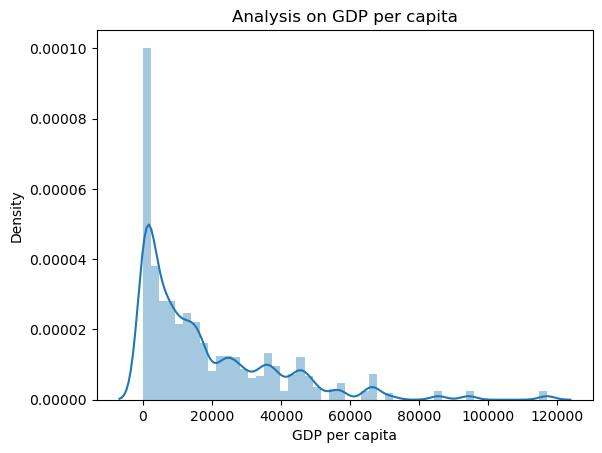

In [21]:
# Perform Univariate analysis on 'gdp_per_capita' column by plotting histogram using seaborn dist plot.

sns.distplot(data['gdp_per_capita'])
plt.title('Analysis on GDP per capita')
plt.xlabel('GDP per capita')
plt.ylabel('Density')
plt.show()

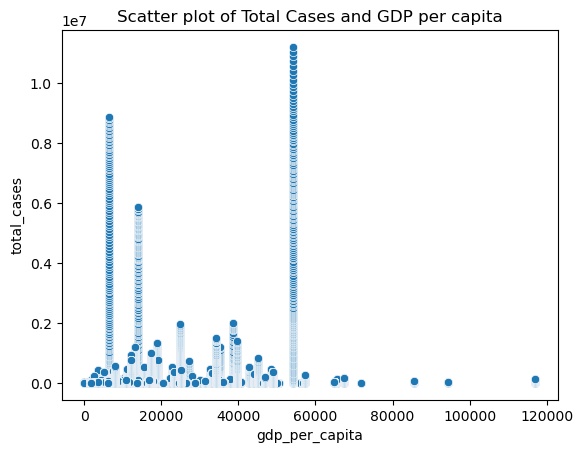

In [22]:
# Plot a scatter plot of 'total_cases' & 'gdp_per_capita'

sns.scatterplot(data=data, y='total_cases', x='gdp_per_capita')
plt.title('Scatter plot of Total Cases and GDP per capita')
plt.show()

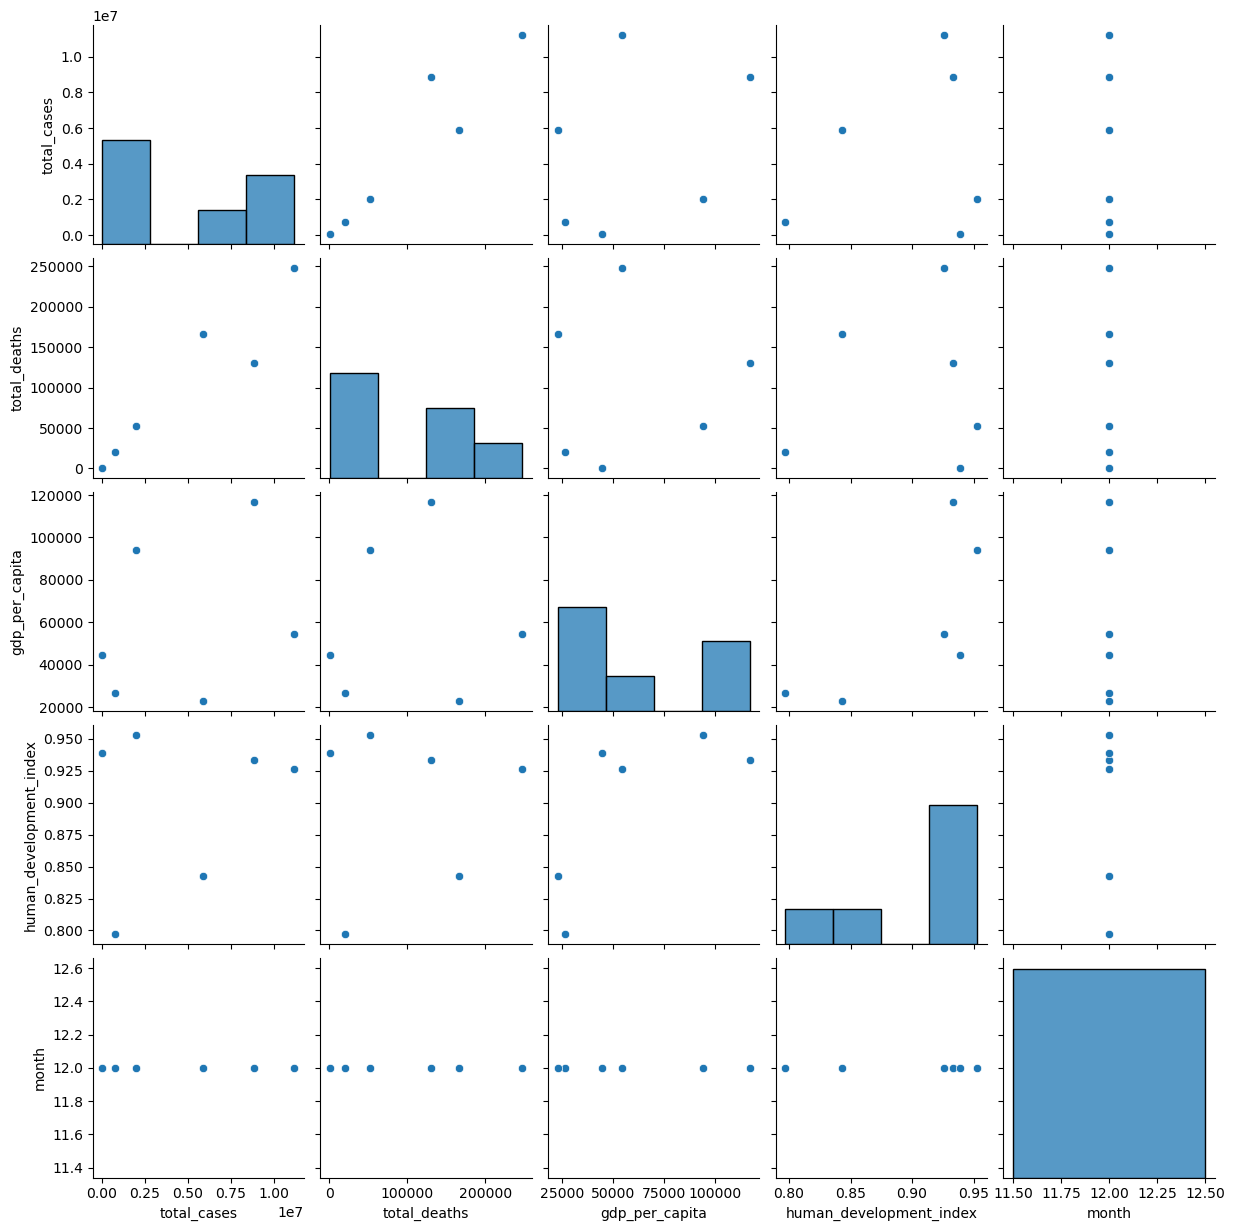

In [23]:
# Plot Pairplot on df_groupby dataset.

sns.pairplot(df_groupby)
plt.show()

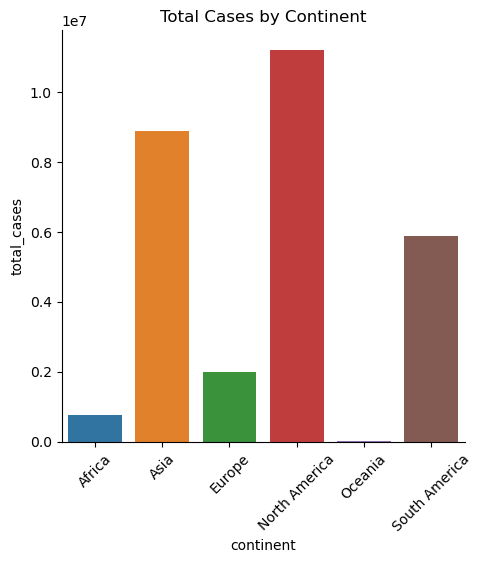

In [24]:
# Plot a bar plot of 'continent' column with 'total_cases' .
    # Tip : using kind='bar' in seaborn catplot

sns.catplot(data=df_groupby, x='continent', y='total_cases', kind='bar')
plt.xticks(rotation=45)
plt.title('Total Cases by Continent')
plt.show()

### 10.Save the df_groupby dataframe in your local drive using pandas.to_csv function .

In [25]:
df_groupby.to_csv('covid_data_groupby.csv', index=False)
print("CSV File has been saved to the Local drive!!!")

CSV File has been saved to the Local drive!!!
